In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/Apaulgithub/oibsip_taskno5/main/Advertising.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Display basic information and summary statistics
df.info()
df.describe()


Missing values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


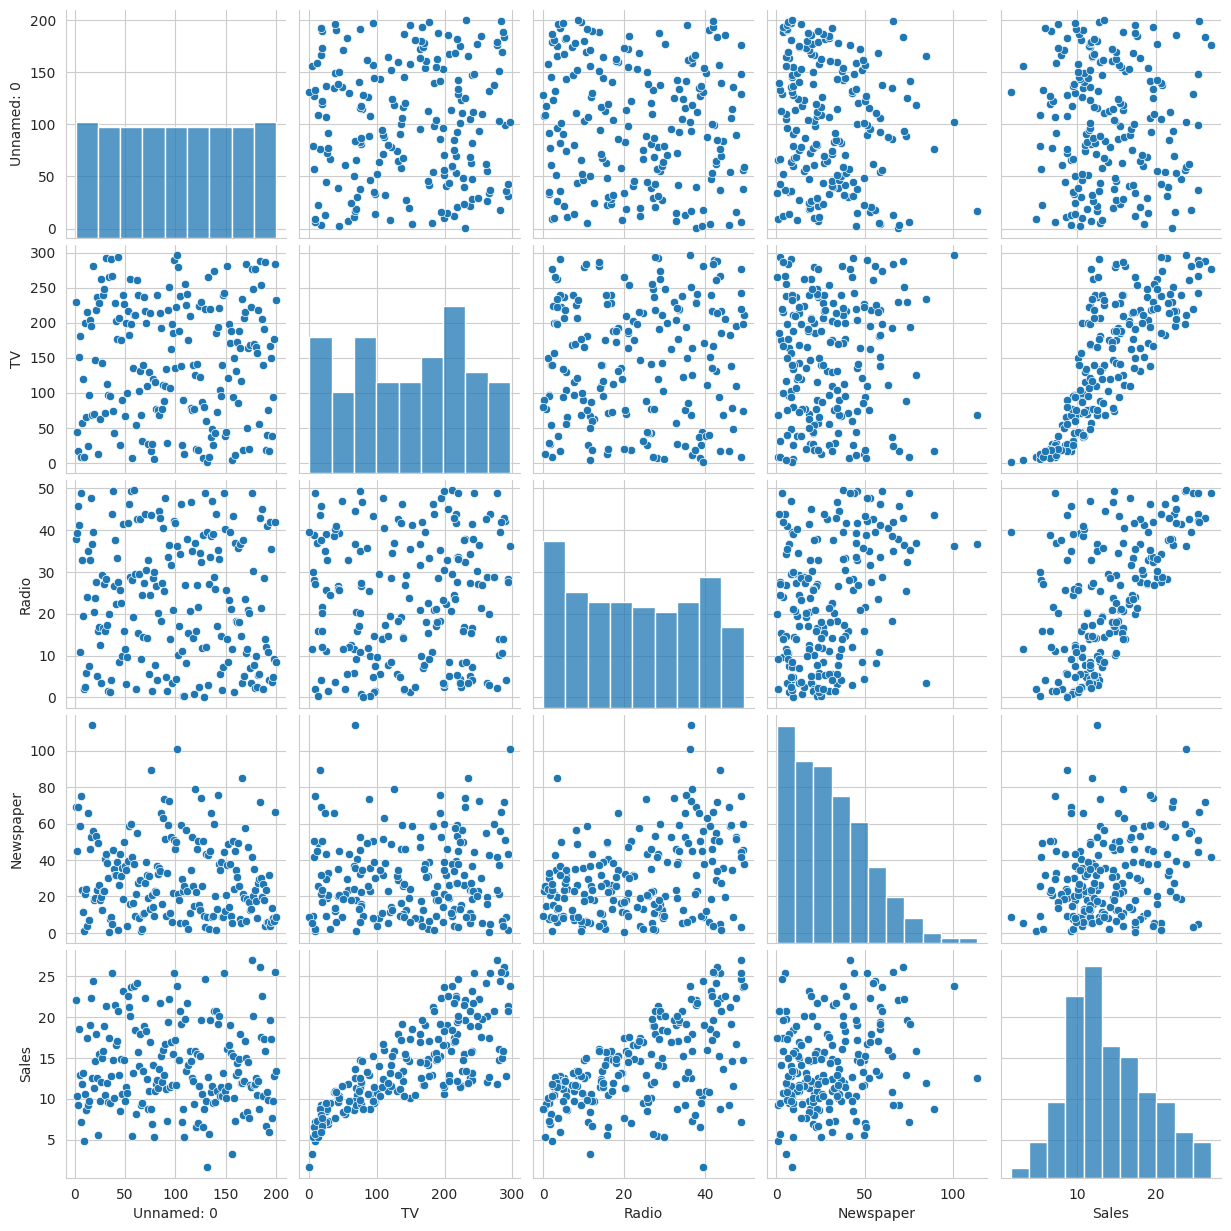

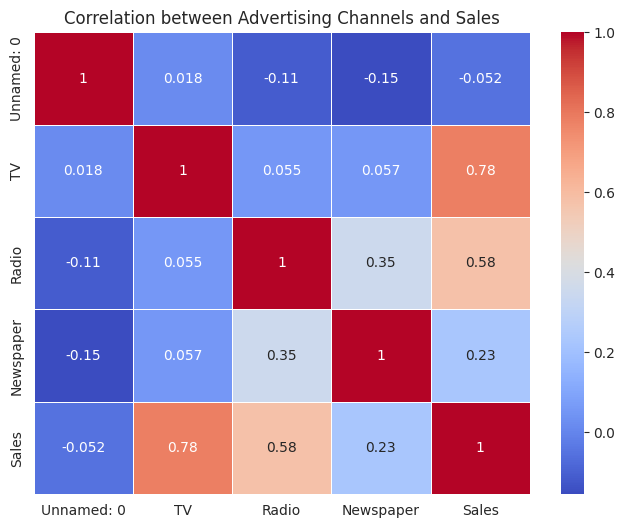

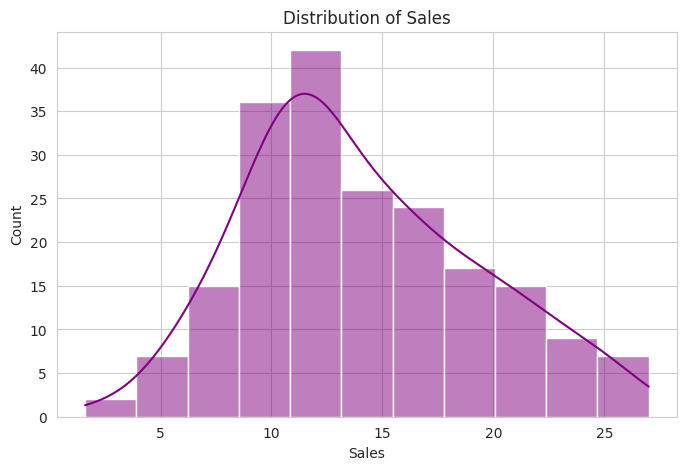

In [3]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for the plots
sns.set_style('whitegrid')

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

# Heatmap for correlation between features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between Advertising Channels and Sales")
plt.show()

# Distribution of Sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], kde=True, color='purple')
plt.title("Distribution of Sales")
plt.show()


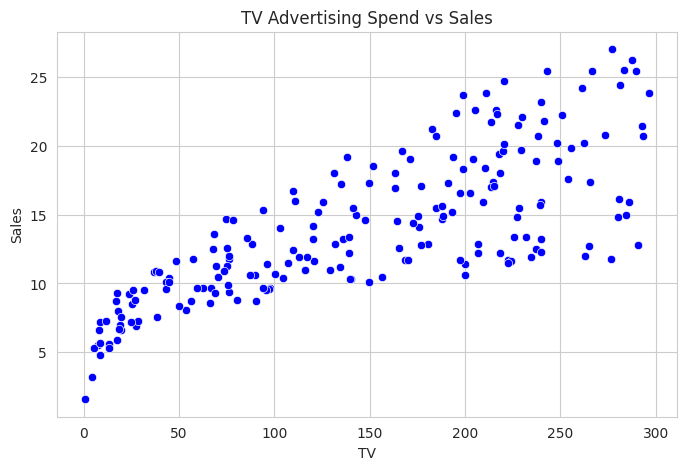

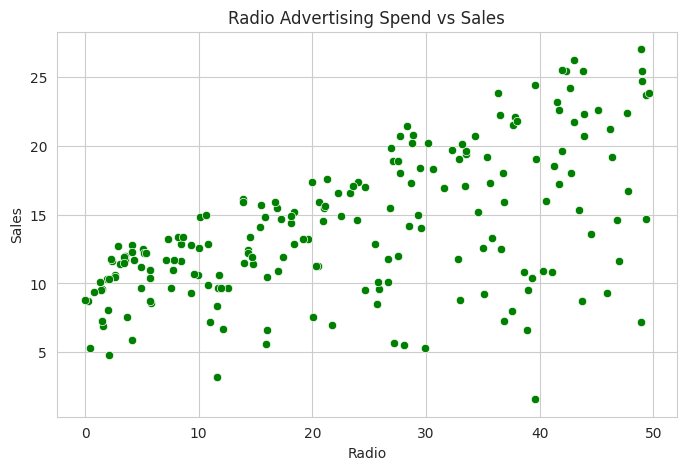

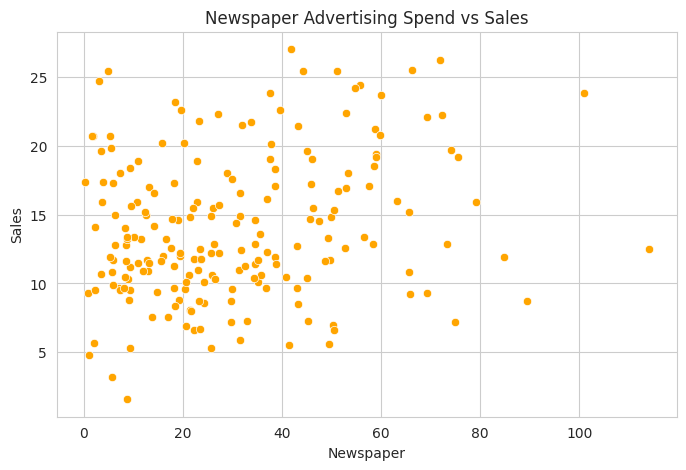

In [4]:
# Relationship between TV Ad Spend and Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='TV', y='Sales', data=df, color='blue')
plt.title("TV Advertising Spend vs Sales")
plt.show()

# Relationship between Radio Ad Spend and Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Radio', y='Sales', data=df, color='green')
plt.title("Radio Advertising Spend vs Sales")
plt.show()

# Relationship between Newspaper Ad Spend and Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Newspaper', y='Sales', data=df, color='orange')
plt.title("Newspaper Advertising Spend vs Sales")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 3.1740973539761033
Mean Absolute Error: 1.4607567168117603
R-squared: 0.899438024100912


<ipython-input-8-6d6a1f2a5518>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='red')


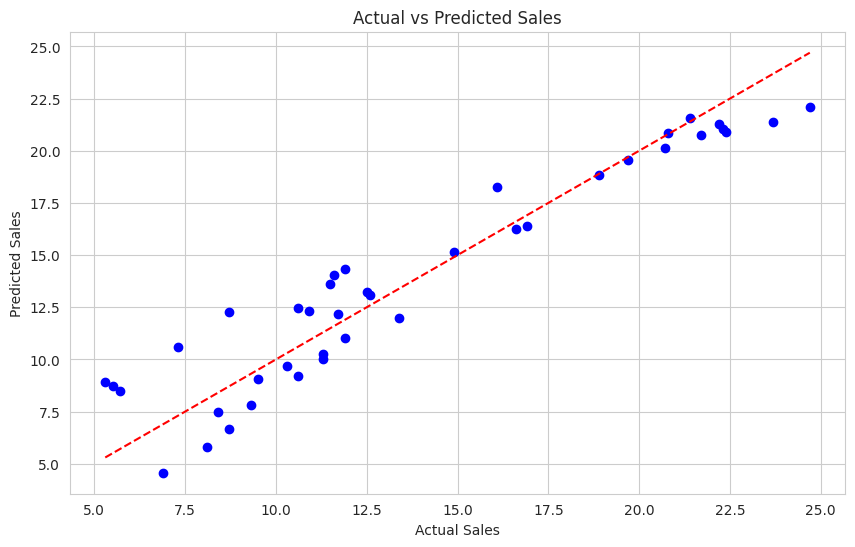

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


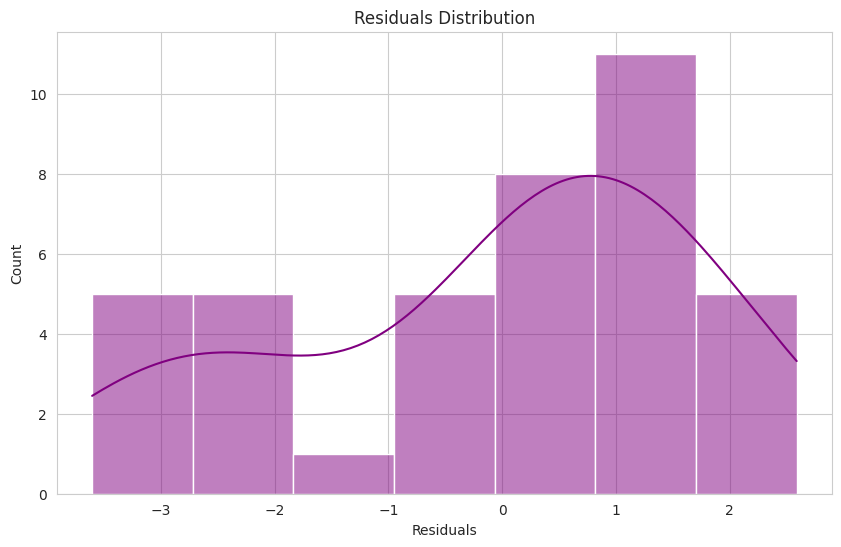

In [9]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()
